# To make the reconstruction of the model, you will need GemGIS installed 
## Also possible to load the gempy model directly from pickle: Go to the last part

In [1]:
import os
#Run this cell only if you want to run gempy in cuda mode (requires cuda and a dedicated cpu).
#Initial compilation will take a bit longer but the model will run much faster 
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"


In [4]:
file_path=os.path.abspath("data/")+os.path.sep

https://github.com/cgre-aachen/gemgis#doc

# Import packages

In [1]:
import sys, os
import matplotlib.pyplot as plt
import gemgis as gg
import geopandas as gpd
import rasterio

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Read the extent of the model

In [2]:
extent = [17.0, 1552.0, -1276.0, -30]  # Hard-coded

extent_model = gpd.read_file(file_path + "extent.shp")
extent_model

,id,geometry
0,1,"POLYGON ((16.584 -30.229, 1551.890 -36.469, 15..."


## Contour lines to tiff

In [3]:
contours = gpd.read_file(file_path + 'Benisson_04_elev_contours.shp')
contours.head()

,id,Z,geometry
0,1,400.00,"LINESTRING (20.079 -593.651, 66.335 -656.728, ..."
1,2,500.00,"LINESTRING (17.555 -434.695, 71.382 -488.521, ..."
2,3,500.00,"LINESTRING (18.509 -1185.410, 85.677 -1141.010..."
3,4,600.00,"LINESTRING (197.245 -1277.624, 184.722 -1245.7..."
4,5,700.00,"LINESTRING (344.105 -1273.070, 328.167 -1253.7..."


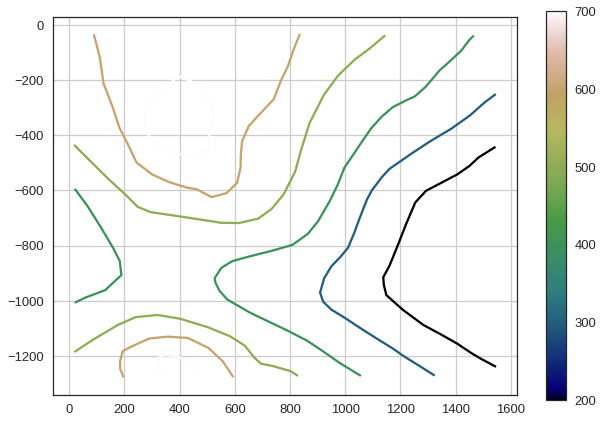

In [4]:
#Plotting
contours.plot(aspect='equal',column='Z', cmap='gist_earth', legend=True)
plt.grid()

In [ ]:
# Interpolating raster
raster = gg.vector.interpolate_raster(gdf=contours,
                                      method='rbf', 
                                      n=100  # change this number if not working the method
                             )
raster[:2]

In [ ]:
#plotting raster
im = plt.imshow(raster, cmap='gist_earth', origin='lower', extent=extent)
plt.grid()
plt.colorbar(im)

In [ ]:
import numpy as np
np.save("bennisson_raster_DEM_04.npy", raster)

In [ ]:
# To tiff
gg.raster.save_as_tiff(raster=raster,
                       path= file_path + 'raster.tif',
                       extent=extent,
                       crs='EPSG:4326',
                      )

## Interfaces

In [6]:
gdf = gpd.read_file(file_path + 'interfaces_point.shp')
dem = rasterio.open(file_path + 'raster.tif')

In [7]:
gdf.head(), dem.read() 

(   id formation                    geometry
 0   1         R   POINT (1127.931 -518.791)
 1   2         R  POINT (1261.543 -1159.685)
 2   3         U     POINT (57.083 -530.782)
 3   4         U    POINT (173.075 -885.855)
 4   5         U    POINT (96.114 -1114.169),
 array([[[616.72158371, 616.91779874, 617.11510059, ..., 378.63973847,
          378.40404655, 378.16952406],
         [616.40448684, 616.60111879, 616.798843  , ..., 378.31333604,
          378.07702658, 377.84188831],
         [616.08693876, 616.28398597, 616.48213087, ..., 377.98718236,
          377.75025191, 377.51449441],
         ...,
         [528.14741925, 528.38202856, 528.61834857, ..., 222.08866781,
          221.92673954, 221.76740465],
         [528.33991642, 528.57261835, 528.80700878, ..., 222.61375924,
          222.45115424, 222.29113791],
         [528.53096398, 528.7617569 , 528.99421629, ..., 223.13969184,
          222.97641381, 222.81571963]]]))

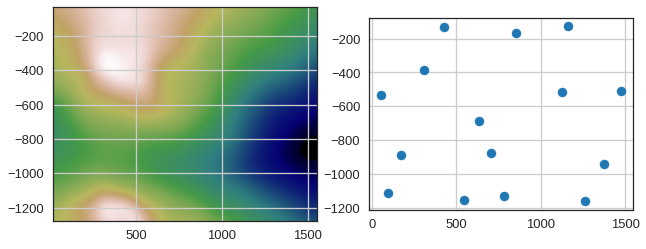

In [8]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(dem.read(1), cmap='gist_earth', extent=extent)
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

In [9]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,R,POINT (1127.931 -518.791),1127.93,-518.79,318.99
1,R,POINT (1261.543 -1159.685),1261.54,-1159.68,255.34
2,U,POINT (57.083 -530.782),57.08,-530.78,464.60
3,U,POINT (173.075 -885.855),173.08,-885.85,399.03
4,U,POINT (96.114 -1114.169),96.11,-1114.17,484.38


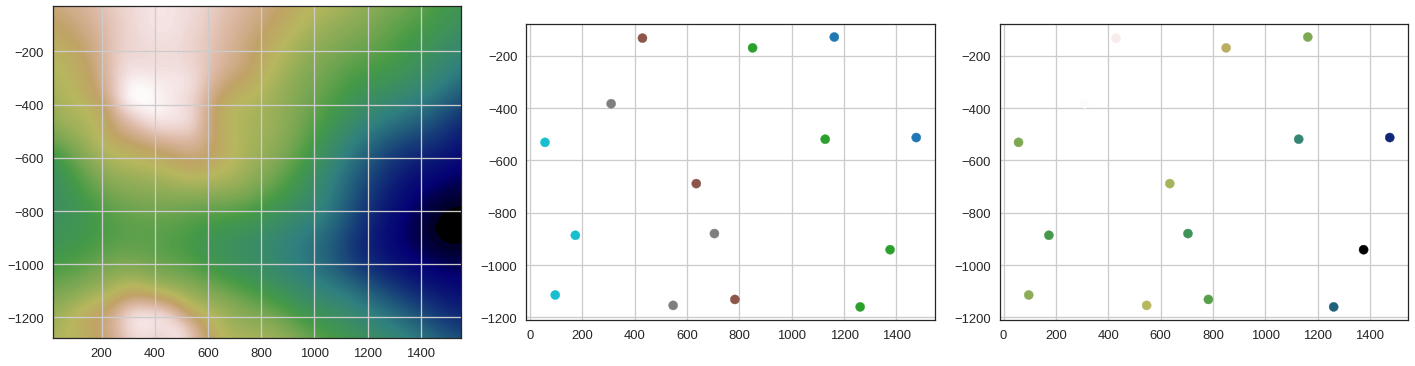

In [10]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.imshow(dem.read(1), cmap='gist_earth', extent=extent )
ax1.grid()

gdf.plot(ax=ax2, aspect='equal', column="formation")
ax2.grid()

gdf_xyz.plot(ax=ax3, aspect='equal', column='Z', cmap='gist_earth')
ax3.grid()

plt.tight_layout()

# Orientations

In [11]:
gdf_or = gpd.read_file(file_path + 'orientation.shp')

In [12]:
gdf_or.head()

,id,formation,Z,geometry
0,1,R,300,"LINESTRING (1150.383 -532.953, 1218.413 -1202...."
1,2,R,200,"LINESTRING (1266.131 -620.896, 1311.341 -1102...."


In [ ]:
orientations = gg.vector.calculate_orientations_from_strike_lines(gdf_or)
orientations

In [ ]:
import numpy as np
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    ncols=2,figsize=(20, 10))
# Plotting the geological map
ax1.imshow(dem.read(1), cmap='gist_earth', extent=extent)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()

# Plotting the geological map
ax2.imshow(dem.read(1), extent=extent, cmap='gist_earth', alpha=0.2)
# Plotting the interfaces on the geological map
ax2.scatter(orientations['X'], orientations['Y'], s=200, color='red')
[ax2.text(orientations['X'][i]+25, orientations['Y'][i]+20,
          s=round(orientations['azimuth'][i])) for i in range(len(orientations))]
[ax2.text(orientations['X'][i]+25, orientations['Y'][i]-20,
          s=round(orientations['dip'][i])) for i in range(len(orientations))]

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()

# Set data to create the gempy model

In [14]:
base_map = dem
interfaces = gdf_xyz

In [ ]:
orientations=orientations

In [15]:
interfaces.head()

,formation,geometry,X,Y,Z
0,R,POINT (1127.931 -518.791),1127.93,-518.79,318.99
1,R,POINT (1261.543 -1159.685),1261.54,-1159.68,255.34
2,U,POINT (57.083 -530.782),57.08,-530.78,464.60
3,U,POINT (173.075 -885.855),173.08,-885.85,399.03
4,U,POINT (96.114 -1114.169),96.11,-1114.17,484.38


In [ ]:
orientations.head()

In [16]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326')

In [17]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

## Set extent 

In [18]:
vmin=0
vmax=1000
geo_data.set_extent(gdf=extent_model, minz=vmin, maxz=vmax)
#geo_data.set_extent(extent[0], extent[1], extent[2], extent[3], vmin, vmax)
geo_data.extent

[17.0, 1552.0, -1276.0, -30.0, 0, 1000]

## Set resolution

In [19]:
geo_data.set_resolution(25,25,25)
geo_data.resolution

[25, 25, 25]

## Attributes

In [20]:
geo_data.raw_i = interfaces
geo_data.raw_i

,formation,geometry,X,Y,Z
0,R,POINT (1127.931 -518.791),1127.93,-518.79,318.99
1,R,POINT (1261.543 -1159.685),1261.54,-1159.68,255.34
2,U,POINT (57.083 -530.782),57.08,-530.78,464.60
3,U,POINT (173.075 -885.855),173.08,-885.85,399.03
4,U,POINT (96.114 -1114.169),96.11,-1114.17,484.38
5,T,POINT (546.747 -1153.934),546.75,-1153.93,541.20
6,T,POINT (704.584 -879.370),704.58,-879.37,371.75
7,T,POINT (309.868 -383.099),309.87,-383.10,717.58
8,S,POINT (429.531 -132.395),429.53,-132.39,704.62
9,S,POINT (635.209 -688.497),635.21,-688.50,521.39


In [ ]:
geo_data.raw_o = orientations
geo_data.raw_o

In [21]:
geo_data.basemap = base_map.read(1)
geo_data.basemap

array([[616.72158371, 616.91779874, 617.11510059, ..., 378.63973847,
        378.40404655, 378.16952406],
       [616.40448684, 616.60111879, 616.798843  , ..., 378.31333604,
        378.07702658, 377.84188831],
       [616.08693876, 616.28398597, 616.48213087, ..., 377.98718236,
        377.75025191, 377.51449441],
       ...,
       [528.14741925, 528.38202856, 528.61834857, ..., 222.08866781,
        221.92673954, 221.76740465],
       [528.33991642, 528.57261835, 528.80700878, ..., 222.61375924,
        222.45115424, 222.29113791],
       [528.53096398, 528.7617569 , 528.99421629, ..., 223.13969184,
        222.97641381, 222.81571963]])

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

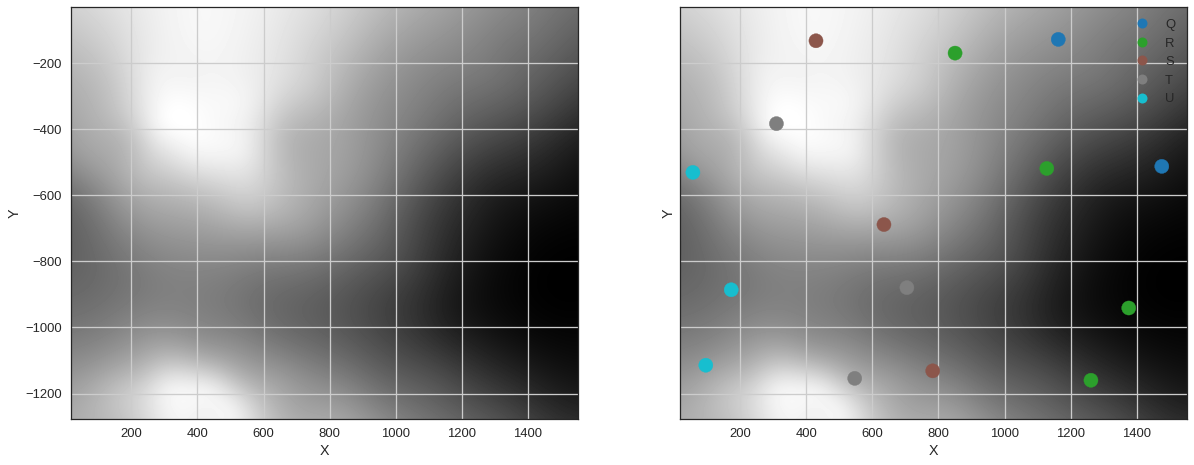

In [22]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_geolmap=False,
                           show_customsections=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           #cmap_geolmap = cols, 
                           cmap_contours='gist_earth'
                           )

In [23]:
geo_data.to_gempy_df(interfaces, 'interfaces')
geo_data.interfaces

,index,X,Y,Z,formation
0,0,1127.93,-518.79,318.99,R
1,1,1261.54,-1159.68,255.34,R
2,2,57.08,-530.78,464.60,U
3,3,173.08,-885.85,399.03,U
4,4,96.11,-1114.17,484.38,U
5,5,546.75,-1153.93,541.20,T
6,6,704.58,-879.37,371.75,T
7,7,309.87,-383.10,717.58,T
8,8,429.53,-132.39,704.62,S
9,9,635.21,-688.50,521.39,S


In [ ]:
geo_data.to_gempy_df(orientations, 'orientations')
geo_data.orientations

In [25]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': [17.0, 1552.0, -1276.0, -30.0, 0, 1000],
 'resolution': [25, 25, 25],
 'interfaces':     index       X        Y      Z formation
 0       0 1127.93  -518.79 318.99         R
 1       1 1261.54 -1159.68 255.34         R
 2       2   57.08  -530.78 464.60         U
 3       3  173.08  -885.85 399.03         U
 4       4   96.11 -1114.17 484.38         U
 5       5  546.75 -1153.93 541.20         T
 6       6  704.58  -879.37 371.75         T
 7       7  309.87  -383.10 717.58         T
 8       8  429.53  -132.39 704.62         S
 9       9  635.21  -688.50 521.39         S
 10     10  782.77 -1131.18 420.99         S
 11     11 1375.94  -941.04 136.00         R
 12     12  850.43  -169.71 564.81         R
 13     13 1475.91  -512.43 192.68         Q
 14     14 1162.68  -128.23 463.80         Q,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': array([

In [26]:
geo_data.stack = {"Strat_Series": ('U', 'T', 'S', 'R', 'Q', 'P')}
# geo_data.stack = {"Strat_Series": ('R')}

geo_data.stack

{'Strat_Series': ('U', 'T', 'S', 'R', 'Q', 'P')}

# Gempy Model

In [2]:
import gempy as gp

No module named 'osgeo'
Not subsurface compatibility available


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/gpuarray/__init__.py", line 227, in <module>
    use(config.device)
  File "/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/gpuarray/__init__.py", line 214, in use
    init_dev(device, preallocate=preallocate)
  File "/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/theano/gpuarray/__init__.py", line 99, in init_dev
    **args)
  File "pygpu/gpuarray.pyx", line 658, in pygpu.gpuarray.init
  File "pygpu/gpuarray.pyx", line 587, in pygpu.gpuarray.pygpu_init
pygpu.gpuarray.GpuArrayException: b'Could not load "libnvrtc.so": libnvrtc.so: cannot open shared object file: No such file or directory'


In [28]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model1  2021-01-29 20:58

In [29]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             #orientations_df = geo_data.orientations,
             default_values=True
            )

Active grids: ['regular']


Model1  2021-01-29 20:58

In [30]:
# Hard coded orientation - orientation with negative orientation
geo_model.add_orientations(X=1236.57, Y=-864.75, Z=250, surface='R', orientation = [85,45,1])


,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,1236.57,-864.75,250.00,0.70,0.06,0.71,0.01,R


In [31]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         #remove_unused_series=True # Something is wrong here
                        )
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,R,Strat_Series,1,#015482,1
1,U,Strat_Series,2,#9f0052,2
2,T,Strat_Series,3,#ffbe00,3
3,S,Strat_Series,4,#728f02,4
4,Q,Strat_Series,5,#443988,5
5,basement,Strat_Series,6,#ff3f20,6


In [32]:
geo_model.set_topography(source='gdal', filepath=file_path + 'raster.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   47.7       , -1251.08      ,    20.        ],
       [   47.7       , -1251.08      ,    60.        ],
       [   47.7       , -1251.08      ,   100.        ],
       ...,
       [ 1551.49869366,   -32.50805153,     0.        ],
       [ 1551.49869366,   -31.50483092,     0.        ],
       [ 1551.49869366,   -30.50161031,     0.        ]])

In [33]:
geo_model.surfaces.df.color[4]="#D2691E" # Change color for better contrast
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,R,Strat_Series,1,#015482,1
1,U,Strat_Series,2,#9f0052,2
2,T,Strat_Series,3,#ffbe00,3
3,S,Strat_Series,4,#728f02,4
4,Q,Strat_Series,5,#D2691E,5
5,basement,Strat_Series,6,#ff3f20,6


In [34]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    #update_kriging = False
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                    values
range             2215.57
$C_o$           116874.79
drift equations       [3]


In [35]:
sol = gp.compute_model(geo_model, compute_mesh=True)

In [36]:
geo_model._grid.topography.save(path=file_path+"topo_raster")

In [37]:
geo_model.save_model_pickle(path=file_path+'temp_model')

True

In [ ]:
# not working
#gp.plot_2d(geo_model, section_names=['topography'], show_contours=True)

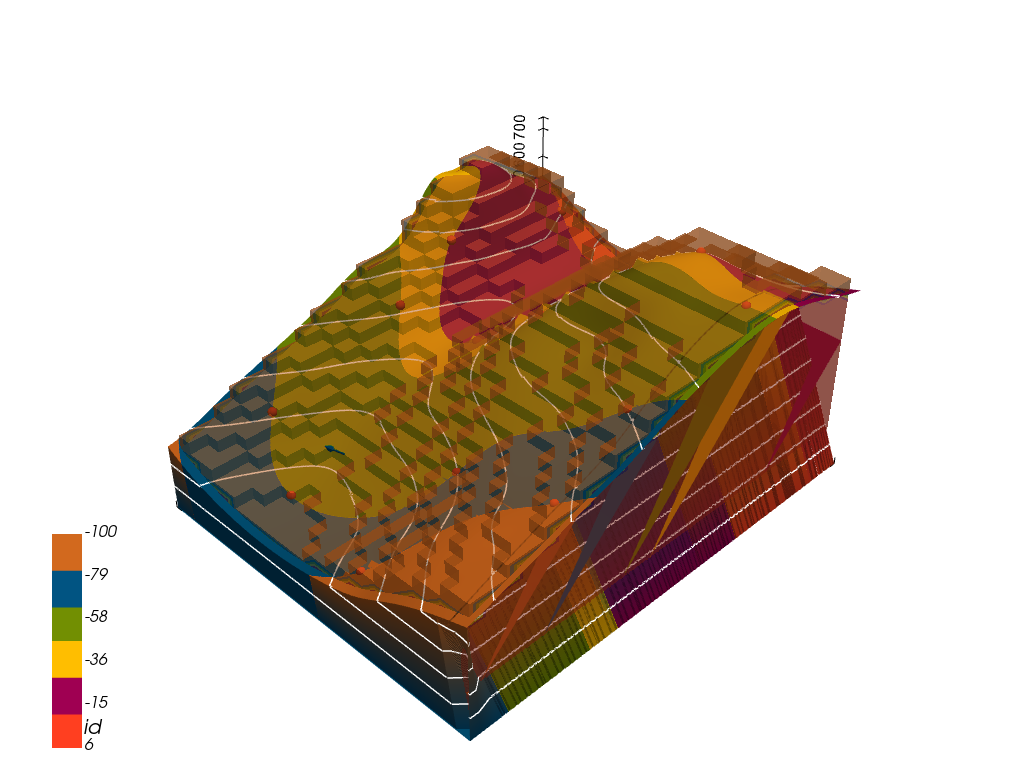

In [39]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

/home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


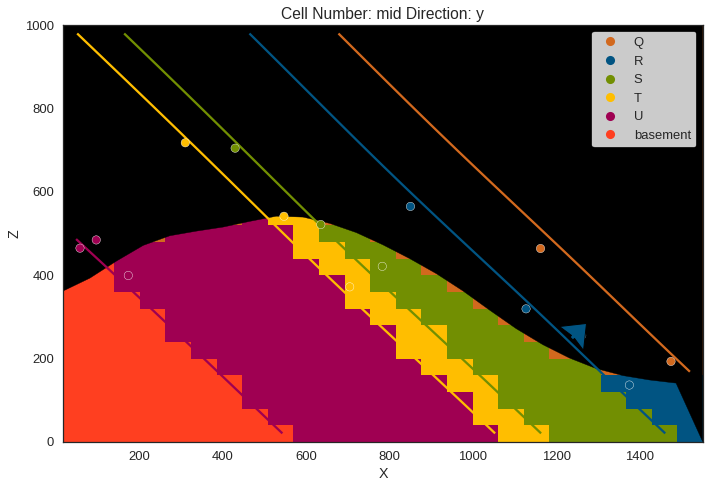

In [40]:
gp.plot_2d(geo_model, direction='y', show_topography=True)

/home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


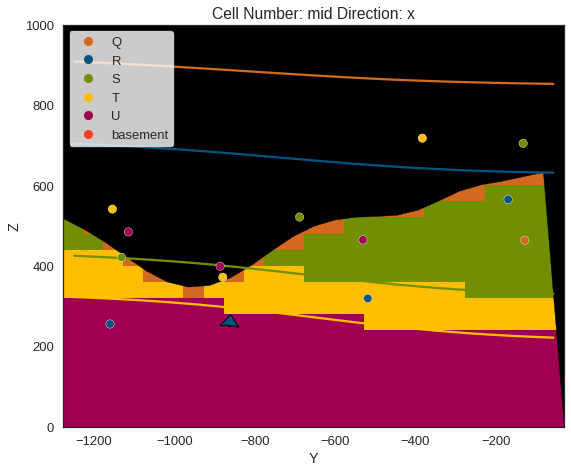

In [41]:
gp.plot_2d(geo_model, direction='x', show_topography=True)

In [ ]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=False, show_lith=False)

# Run in sandbox

## Load pickle model

In [5]:
import gempy as gp
geo_model = gp.load_model_pickle(file_path+'temp_model.pickle')
geo_model.set_topography(source="saved", filepath=file_path+"topo_raster.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/home/daniel/GitProjets/open_AR_Sandbox/notebooks/tutorials/04_GempyModule/Model_Construction/Bennisson_model/data/temp_model.pickle'

In [49]:
# To change the resolution of the model - For cross sections and 3D model - Need to remove topography first
#geo_model.set_regular_grid([   17.,  1548., -1277.,   -35., 0, 1000], [50,50,50])

In [55]:
# Cross-section
#section_dict = {'Aruco_section': ([320, -750], [1230, -440], [100, 80])}
#geo_model.set_section_grid(section_dict)
#gp.compute_model(geo_model, compute_mesh=True)
#fig = gp.plot_2d(geo_model, section_names=["Aruco_section"], show_topography=True)


## Initialize sandbox with gempy module

In [57]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "fw_projector_calibration.json"
_calibsensor = _calibration_dir + "fw_sensor_calibration.json"

In [58]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="dummy")

JSON configuration loaded for sensor.
DummySensor initialized.


In [59]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)


JSON configuration loaded for projector.


Launching server at http://localhost:42841
Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [61]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
# If want to use aruco dummy's need to create a dummy sensor
sensor2 = Sensor(calibsensor=_calibsensor, name="dummy")
aruco = MarkerDetection(sensor=sensor2)

JSON configuration loaded for sensor.
DummySensor initialized.
Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
using dummy aruco module
Aruco module loaded
Aruco detection ready


In [62]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)
# Start the thread 
main.run()

Thread started or resumed...


tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7eff0127c5d0>>, <Task finished coro=<_needs_document_lock.<locals>._needs_document_lock_wrapper() done, defined at /home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/bokeh/server/session.py:51> exception=AttributeError("'NoneType' object has no attribute 'dpi'")>)
Traceback (most recent call last):
  File "/home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/tornado/ioloop.py", line 765, in _discard_future_result
    future.result()
  File "/home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/bokeh/server/session.py", line 67, in _needs_document_lock_wrapper
    result = func(self, *args, **kwargs)
  File "/home/danielsk78/anaconda3/e

In [63]:
main.widget_plot_module()

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Show colormap', value=True)
                [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                [3] Column
                    [0] Markdown(str)
                    [1] WidgetBox
                        [0] Checkbox(name='Show relief shading', value=True)
                        [1] FloatSlider(end=360.0, name='Azimuth', value=315, value_throttled=315)
                        [2] FloatSlider(end=90.0, name='Altitude', value=45, value_throttled=45)
                        [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25, value_throttled=0.25)
            [1] Column
                [0] Markdown(str)
                [1] Checkbox(name='Active contours', value=True)
                [2] Checkbox(name='Automatic levels f...)
                [3] Markdown(str)
                [4] WidgetBox
                    [0] Checkbox(name='Show major contours', value=True)
                    [1] IntInput(name='Choose a contour step', value=100, value_throttled=100)
                    [2] Checkbox(name='Show minor contours', value=True)
                    [3] IntInput(name='Choose a minor c..., value=50, value_throttled=50)
                    [4] Checkbox(name='Show contours label', value=True)
                    [5] IntInput(name='set a contour l..., value=15, value_throttled=15)
        [1] Column
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Aruco Detection', value=True)
                [2] Column
                    [0] Markdown(str)
                    [1] Row
                        [0] WidgetBox
                            [0] Checkbox(name='Show aruco location', value=True)
                            [1] Checkbox(name='Show aruco id', value=True)
                            [2] Checkbox(name='Show line connecting a...)
                            [3] ColorPicker(name='Color', value='#ff0000')
                        [1] WidgetBox
                            [0] Markdown(str)
                            [1] Row
                                [0] IntInput(name='id', value=1, value_throttled=1, width=70)
                                [1] IntInput(name='x coordinate', value=50, value_throttled=50, width=70)
                                [2] IntInput(name='y coordinate', value=50, value_throttled=50, width=70)
                            [2] Button(button_type='success', name='Add dummy aruco dict')
                            [3] Button(button_type='warning', name='Clear aruco dict')
            [1] Column
                [0] Markdown(str)
                [1] RadioButtonGroup(button_type='success', name='Thread controller', options=['Start', 'Stop'], value='Start')
                [2] Checkbox(name='Check changes in fame')
                [3] CrossSelector(definition_order=False, name='Module manager', options=['CmapModule', ...], value=['CmapModule', ...])
                [4] Button(button_type='warning', name='Clear axes from p...)
                [5] Markdown(str)

tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <tornado.platform.asyncio.AsyncIOMainLoop object at 0x7eff0127c5d0>>, <Task finished coro=<_needs_document_lock.<locals>._needs_document_lock_wrapper() done, defined at /home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/bokeh/server/session.py:51> exception=AttributeError("'NoneType' object has no attribute 'dpi'")>)
Traceback (most recent call last):
  File "/home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/tornado/ioloop.py", line 765, in _discard_future_result
    future.result()
  File "/home/danielsk78/anaconda3/envs/gemgis/lib/python3.7/site-packages/bokeh/server/session.py", line 67, in _needs_document_lock_wrapper
    result = func(self, *args, **kwargs)
  File "/home/danielsk78/anaconda3/e

In [64]:
from sandbox.modules import gempy
gpsb= gempy.gempy_module.GemPyModule(geo_model = geo_model, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = False,
                 )

scale in Model units/ mm (X,Y,Z): [1.5350000000000001, 1.5575, 3.8461538461538463]
the shown extent is [17.0, 1552.0, -1276.0, -30.0] 
Active grids: ['regular' 'topography' 'sections']


In [65]:
main.add_module(name='gempy', module=gpsb)

module gempy added to modules


# Now you can move the sand and modify the model 
- Is also possible to load the raster data 

In [67]:
from sandbox import _test_data 
main.load_frame(from_file = _test_data['topo'] + "bennisson_raster_DEM_04.npy")

# Run again if no change

loaded .npy file


True

<b>To recreate this raster in the sandbox, open the LoadSaveTopoModule</b>

In [79]:
# to go back to the normal frames run:
main.load_frame(None)


No frame to load


False

In [77]:







main.stop()

thread was not running.


# Playground

In [ ]:
main.stop()
fig = projector.figure
#main.run()
fig

In [ ]:
fig.savefig("bennisson_DEM_04_modified_topo.png", dpi=500)

In [71]:
#For the hacked cross-section
main.run()
aruco.set_aruco_position({4:[46,96], 7:[206,142]})
main.stop()
import numpy as np
gpsb.modelspace_arucos.box_x = np.array([320, 1230])
gpsb.modelspace_arucos.box_y = np.array([-750, -440])
print(gpsb.modelspace_arucos)
aruco.plot_aruco(ax=projector.ax, df_position=gpsb.modelspace_arucos)
projector.trigger()

Thread started or resumed...
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Thread stopped.
   box_x  box_y  is_inside_box  box_z
4    320   -750           True 708.19
7   1230   -440           True   0.00


True

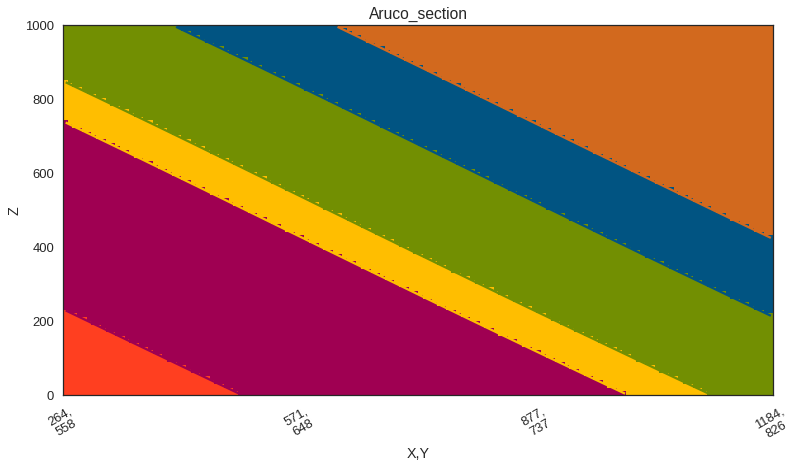

In [74]:
fig_cross = gpsb.show_cross_section("Aruco_section")

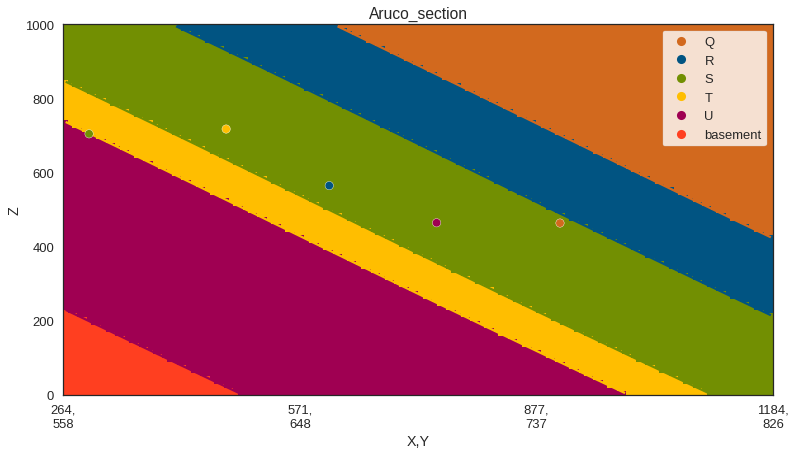

In [75]:
figure = gp.plot_2d(gpsb.geo_model, section_names=["Aruco_section"], show_data=True, show_topography=True,
                                            show=False)
figure.fig.axes[0].set_aspect(0.5)

In [ ]:
figure.fig.savefig("bennisson_crop_section_extended.png", dpi=500)